In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\ACER\Documents\sales.csv")
df

,Date,Product,Region,Price,Quantity
0,2024-01-05,Laptop,Asia,800,2
1,2024-01-07,Mobile,Europe,500,3
2,2024-02-10,Tablet,Asia,300,5
3,2024-02-15,Laptop,America,820,1
4,2024-03-05,Mobile,Asia,480,4
5,2024-03-18,Tablet,Europe,310,2
6,2024-04-02,Laptop,Europe,850,3
7,2024-04-10,Mobile,America,520,2
8,2024-05-01,Tablet,Asia,290,6
9,2024-05-15,Laptop,Asia,830,2


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      10 non-null     object
 1   Product   10 non-null     object
 2   Region    10 non-null     object
 3   Price     10 non-null     int64 
 4   Quantity  10 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 532.0+ bytes


,Price,Quantity
count,10.000000,10.000000
mean,570.000000,3.000000
std,234.710223,1.563472
min,290.000000,1.000000
25%,352.500000,2.000000
50%,510.000000,2.500000
75%,815.000000,3.750000
max,850.000000,6.000000


In [17]:
df

,Date,Product,Region,Price,Quantity,Revenue,Month
0,2024-01-05,Laptop,Asia,800,2,1600,January
1,2024-01-07,Mobile,Europe,500,3,1500,January
2,2024-02-10,Tablet,Asia,300,5,1500,February
3,2024-02-15,Laptop,America,820,1,820,February
4,2024-03-05,Mobile,Asia,480,4,1920,March
5,2024-03-18,Tablet,Europe,310,2,620,March
6,2024-04-02,Laptop,Europe,850,3,2550,April
7,2024-04-10,Mobile,America,520,2,1040,April
8,2024-05-01,Tablet,Asia,290,6,1740,May
9,2024-05-15,Laptop,Asia,830,2,1660,May


In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      10 non-null     datetime64[ns]
 1   Product   10 non-null     object        
 2   Region    10 non-null     object        
 3   Price     10 non-null     int64         
 4   Quantity  10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 532.0+ bytes


In [11]:
df.isnull().sum()

Date        0
Product     0
Region      0
Price       0
Quantity    0
dtype: int64

In [12]:
df['Revenue'] = df['Price']*df['Quantity']
df

,Date,Product,Region,Price,Quantity,Revenue
0,2024-01-05,Laptop,Asia,800,2,1600
1,2024-01-07,Mobile,Europe,500,3,1500
2,2024-02-10,Tablet,Asia,300,5,1500
3,2024-02-15,Laptop,America,820,1,820
4,2024-03-05,Mobile,Asia,480,4,1920
5,2024-03-18,Tablet,Europe,310,2,620
6,2024-04-02,Laptop,Europe,850,3,2550
7,2024-04-10,Mobile,America,520,2,1040
8,2024-05-01,Tablet,Asia,290,6,1740
9,2024-05-15,Laptop,Asia,830,2,1660


In [20]:
df['Year'] = df['Date'].dt.year
df

,Date,Product,Region,Price,Quantity,Revenue,Month,Year
0,2024-01-05,Laptop,Asia,800,2,1600,January,2024
1,2024-01-07,Mobile,Europe,500,3,1500,January,2024
2,2024-02-10,Tablet,Asia,300,5,1500,February,2024
3,2024-02-15,Laptop,America,820,1,820,February,2024
4,2024-03-05,Mobile,Asia,480,4,1920,March,2024
5,2024-03-18,Tablet,Europe,310,2,620,March,2024
6,2024-04-02,Laptop,Europe,850,3,2550,April,2024
7,2024-04-10,Mobile,America,520,2,1040,April,2024
8,2024-05-01,Tablet,Asia,290,6,1740,May,2024
9,2024-05-15,Laptop,Asia,830,2,1660,May,2024


In [16]:
df['Month'] = df['Date'].dt.month_name()
df

,Date,Product,Region,Price,Quantity,Revenue,Month
0,2024-01-05,Laptop,Asia,800,2,1600,January
1,2024-01-07,Mobile,Europe,500,3,1500,January
2,2024-02-10,Tablet,Asia,300,5,1500,February
3,2024-02-15,Laptop,America,820,1,820,February
4,2024-03-05,Mobile,Asia,480,4,1920,March
5,2024-03-18,Tablet,Europe,310,2,620,March
6,2024-04-02,Laptop,Europe,850,3,2550,April
7,2024-04-10,Mobile,America,520,2,1040,April
8,2024-05-01,Tablet,Asia,290,6,1740,May
9,2024-05-15,Laptop,Asia,830,2,1660,May


In [57]:
month_order = [
    'January', 'February', 'March', 'April', 'May'
]
df['Month'] = pd.Categorical(
    df['Month'],
    categories=month_order,
    ordered=True
)


In [21]:
total_revenue = df['Revenue'].sum()
print('Toal revenue is : ',total_revenue)

Toal revenue is :  14950


In [30]:
best_product = df.groupby('Product')['Revenue'].sum()
region_sales

Product
Laptop    6630
Mobile    4460
Tablet    3860
Name: Revenue, dtype: int64

In [58]:
monthly_sales = df.groupby('Month')['Revenue'].sum().sort_index()
monthly_sales

C:\Users\ACER\AppData\Local\Temp\ipykernel_17692\7609219.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = df.groupby('Month')['Revenue'].sum().sort_index()


Month
January     3100
February    2320
March       2540
April       3590
May         3400
Name: Revenue, dtype: int64

In [31]:
region_sales = df.groupby('Region')['Revenue'].sum()
region_sales

Region
America    1860
Asia       8420
Europe     4670
Name: Revenue, dtype: int64

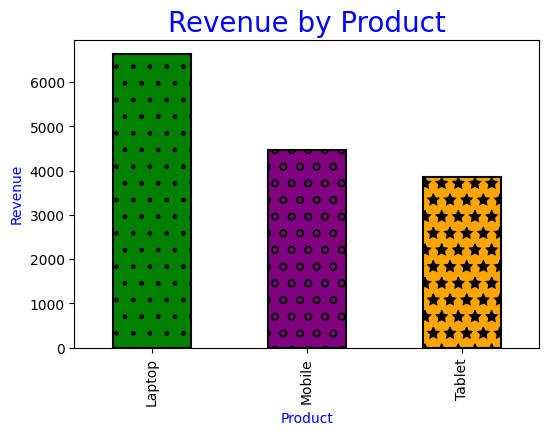

In [48]:
best_product.plot(kind='bar', figsize=(6,4),color=['g','purple','orange'],edgecolor='black',linewidth=1.5,hatch=['.','o','*'])
plt.title("Revenue by Product",color='b',fontsize=20)
plt.ylabel("Revenue",color='b')
plt.xlabel('Product',color='b')
plt.show()


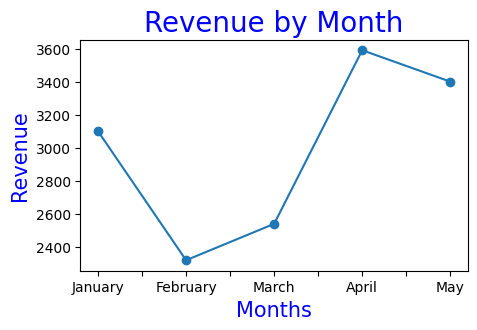

In [63]:
monthly_sales.plot(kind='line', figsize=(5,3),marker='o')
plt.title("Revenue by Month",color='b',fontsize=20)
plt.ylabel('Revenue',color='b',fontsize=15)
plt.xlabel('Months',color='b',fontsize=15)
plt.show()

# Conclusion

- Laptops generate the highest revenue among all products.
- Asia contributes the most to overall sales.
- Sales show an increasing trend in later months.
- Product pricing has a significant impact on total revenue.
